# Seoul Bike Sharing Demand Dataset

DATASET: UCI MACHINE LEARNING REPOSITORY


Source: http://data.seoul.go.kr/ SOUTH KOREA PUBLIC HOLIDAYS. URL:publicholidays.go.kr

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import copy
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
cols  = ['date','bike_count', 'hour', 'temp', 'humidity', 'wind_speed', 'visibility', 'dew_pt_temp', 'radiation', 'rainfall', 'snowfall','Seasons','holiday', 'functional']
df = pd.read_csv('SeoulBikeData.csv')
df.columns = cols
df.head()

,date,bike_count,hour,temp,humidity,wind_speed,visibility,dew_pt_temp,radiation,rainfall,snowfall,Seasons,holiday,functional
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df = df.drop('date', axis=1)

In [4]:
df.shape

(8760, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bike_count   8760 non-null   int64  
 1   hour         8760 non-null   int64  
 2   temp         8760 non-null   float64
 3   humidity     8760 non-null   int64  
 4   wind_speed   8760 non-null   float64
 5   visibility   8760 non-null   int64  
 6   dew_pt_temp  8760 non-null   float64
 7   radiation    8760 non-null   float64
 8   rainfall     8760 non-null   float64
 9   snowfall     8760 non-null   float64
 10  Seasons      8760 non-null   object 
 11  holiday      8760 non-null   object 
 12  functional   8760 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 889.8+ KB


In [6]:
df.describe()

,bike_count,hour,temp,humidity,wind_speed,visibility,dew_pt_temp,radiation,rainfall,snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
# Checking for null values
df.isnull().sum()

bike_count     0
hour           0
temp           0
humidity       0
wind_speed     0
visibility     0
dew_pt_temp    0
radiation      0
rainfall       0
snowfall       0
Seasons        0
holiday        0
functional     0
dtype: int64

In [8]:
# Dummy variable encoding to transform the text data into numerical data
df_dummies = pd.get_dummies(df,columns= ['Seasons', 'holiday', 'functional'], dtype=int)

In [9]:
df_dummies.head()

,bike_count,hour,temp,humidity,wind_speed,visibility,dew_pt_temp,radiation,rainfall,snowfall,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,holiday_Holiday,holiday_No Holiday,functional_No,functional_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1


In [10]:
df_dummies.shape

(8760, 18)

In [57]:
# split into tarets and features
X_data = df_dummies.drop(['bike_count'], axis=1)
y_data = df_dummies['bike_count']

In [12]:
# Initialize the scaler to features only
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)

In [13]:
# Converting the scaled features back to a dataframe
X_df = pd.DataFrame(X_scaled, columns=X_data.columns)
X_df.head()

,hour,temp,humidity,wind_speed,visibility,dew_pt_temp,radiation,rainfall,snowfall,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,holiday_Holiday,holiday_No Holiday,functional_No,functional_Yes
0,0.000000,0.220280,0.377551,0.297297,1.0,0.224913,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.043478,0.215035,0.387755,0.108108,1.0,0.224913,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.086957,0.206294,0.397959,0.135135,1.0,0.223183,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.130435,0.202797,0.408163,0.121622,1.0,0.224913,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.173913,0.206294,0.367347,0.310811,1.0,0.207612,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [14]:
# Implementing Variance Threshold
from sklearn.feature_selection import VarianceThreshold

# Initializing the Variance Threshold
selector = VarianceThreshold(threshold=0.05)
X_selector = selector.fit_transform(X_df)

In [15]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_df.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
10,Seasons_Spring,0.188523
11,Seasons_Summer,0.188523
9,Seasons_Autumn,0.187157
12,Seasons_Winter,0.185776
4,visibility,0.095045
0,hour,0.090580
6,radiation,0.060905
5,dew_pt_temp,0.051051
13,holiday_Holiday,0.046883
14,holiday_No Holiday,0.046883


In [64]:
# Select new columns
X_new = X_df[X_df.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

,hour,visibility,dew_pt_temp,radiation,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0.000000,1.0,0.224913,0.0,0.0,0.0,0.0,1.0
1,0.043478,1.0,0.224913,0.0,0.0,0.0,0.0,1.0
2,0.086957,1.0,0.223183,0.0,0.0,0.0,0.0,1.0
3,0.130435,1.0,0.224913,0.0,0.0,0.0,0.0,1.0
4,0.173913,1.0,0.207612,0.0,0.0,0.0,0.0,1.0


In [17]:
X_df.shape

(8760, 17)

### Experimenting with different thresholds

In [18]:
# Creating Variance Threshold objects
var_1 = VarianceThreshold(threshold=0.1)
var_2 = VarianceThreshold(threshold=0.03)
var_3 = VarianceThreshold(threshold=0.15)

In [19]:
var_1.fit(X_df)

VarianceThreshold(threshold=0.1)

In [20]:
var_2.fit(X_df)

VarianceThreshold(threshold=0.03)

In [23]:
var_3.fit(X_df)

VarianceThreshold(threshold=0.15)

In [25]:
# Selecting the subset of columns
X_1 = X_df[X_df.columns[var_1.get_support(indices=True)]]
X_2 = X_df[X_df.columns[var_2.get_support(indices=True)]]
X_3 = X_df[X_df.columns[var_3.get_support(indices=True)]]

### Plotting the number of predictors for each threshold

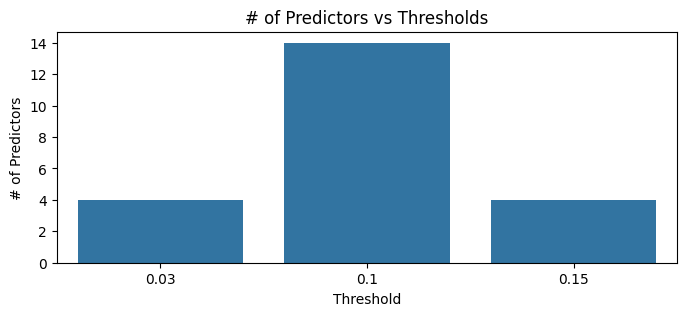

In [26]:
# Create figure and axes
f, ax = plt.subplots(figsize=(8, 3), nrows=1, ncols=1)

# Create list of titles and predictions to use in for loop
subset_preds = [X_1.shape[1], X_2.shape[1], X_3.shape[1]]
thresholds = ['0.03', '0.1', '0.15']

# Plot graph
ax.set_title('# of Predictors vs Thresholds')
ax.set_ylabel('# of Predictors')
ax.set_xlabel('Threshold')
sns.barplot(x=thresholds, y=subset_preds)
plt.show()

### OLS fit summary

In [29]:
# OLS formula
y = 'bike_count'
formula = y +' ~ '+' + '.join(X_new.columns)
print('Formula:\n\t{}'.format(formula))

Formula:
	bike_count ~ hour + visibility + dew_pt_temp + radiation + Seasons_Autumn + Seasons_Spring + Seasons_Summer + Seasons_Winter


In [30]:
# Fit the model using the model dataframe
model = ols(formula=formula, data=df_dummies)
fitted = model.fit()

print(fitted.summary())


                            OLS Regression Results                            
Dep. Variable:             bike_count   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     883.5
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:21:16   Log-Likelihood:                -66759.
No. Observations:                8760   AIC:                         1.335e+05
Df Residuals:                    8752   BIC:                         1.336e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -17.8057     14.267     -1.

SPLITTING THE DATASET INTO TRAINING AND TESTING

In [60]:
# Train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [61]:
# No var threshold
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [65]:
# Get training and testing data for variance threshold model
X_var_train = X_train[X_var_names]
X_var_test = X_test[X_var_names]

In [66]:
# fit the variance threshold model
lr_var = LinearRegression()
lr_var.fit(X_var_train, y_train)

LinearRegression()

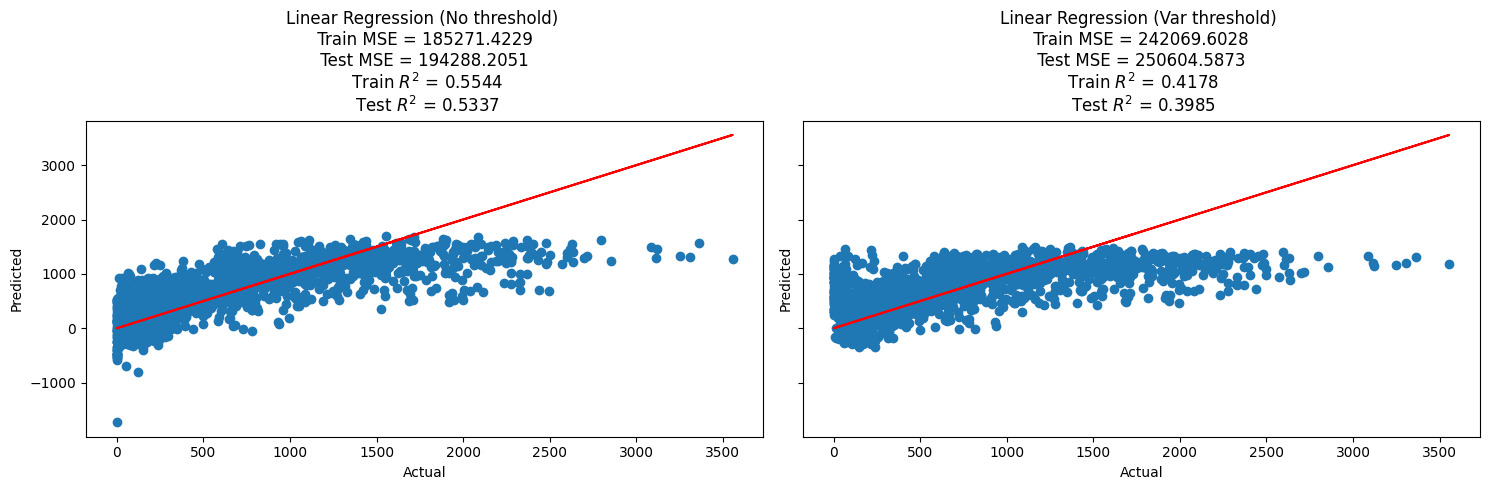

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Create figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=2, sharey=True)

# Create list of titles and predictions to use in for loop
train_pred = [lr.predict(X_train), lr_var.predict(X_var_train)]
test_pred = [lr.predict(X_test), lr_var.predict(X_var_test)]
title = ['No threshold', 'Var threshold']

# Loop through all axes to plot each model's results
for i in range(2):
    test_mse = round(mean_squared_error(y_test, test_pred[i]), 4)
    test_r2 = round(r2_score(y_test, test_pred[i]), 4)
    train_mse = round(mean_squared_error(y_train, train_pred[i]), 4)
    train_r2 = round(r2_score(y_train, train_pred[i]), 4)

    title_str = f"Linear Regression ({title[i]}) \n Train MSE = {train_mse} \n " + \
                f"Test MSE = {test_mse} \n Train $R^2$ = {train_r2} \n " + \
                f"Test $R^2$ = {test_r2}"

    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])

plt.tight_layout()
plt.show()
